In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 78s 0us/step


In [3]:
# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

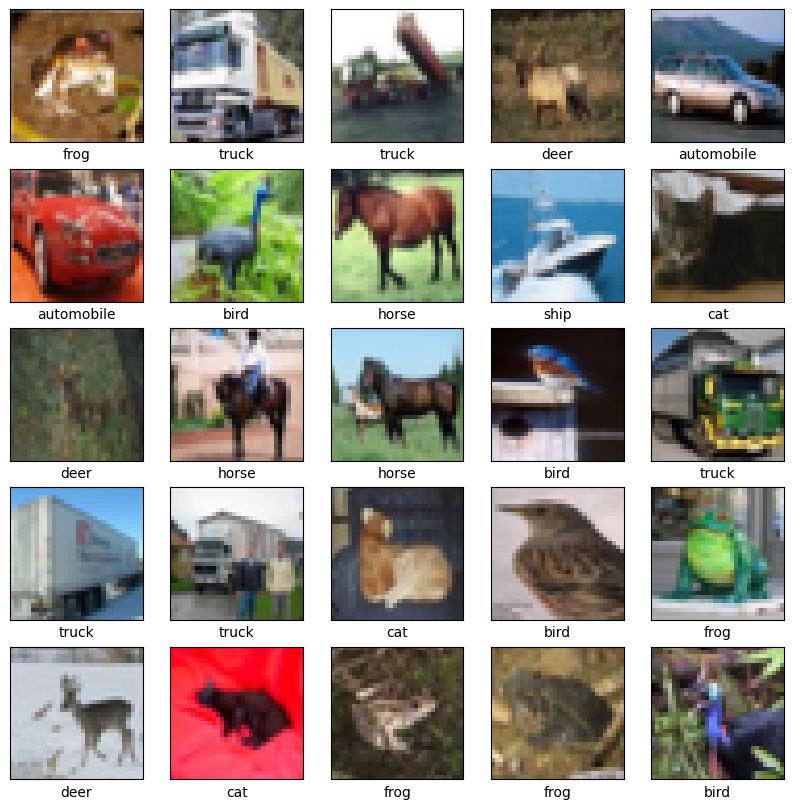

In [ ]:
# 1. Plot sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

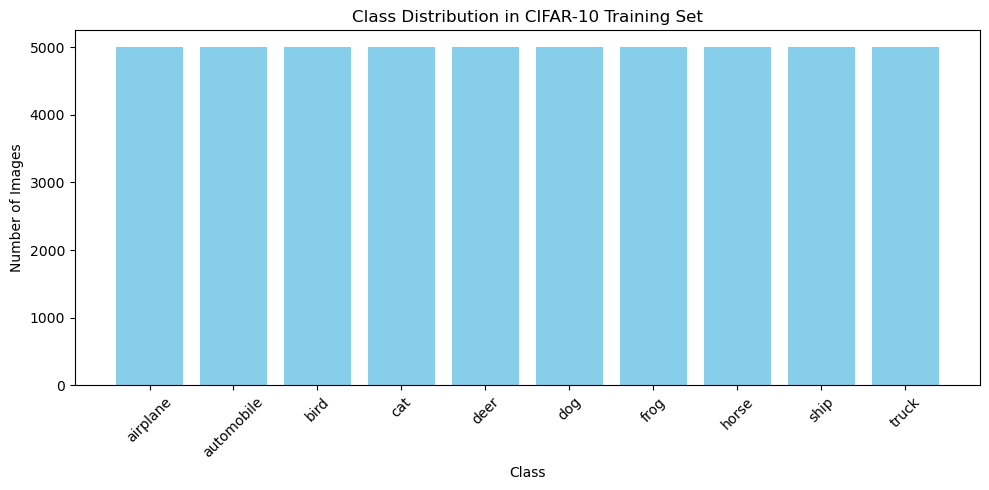

In [11]:
# 2. Class distribution analysis
class_counts = Counter(y_train.flatten())
class_counts = [class_counts[i] for i in range(10)]  # Order by class index
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in CIFAR-10 Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# 3. Pixel value statistics
pixel_values = x_train.flatten()
mean_pixel = np.mean(pixel_values)
std_pixel = np.std(pixel_values)
print(f"Pixel Statistics (before normalization):")
print(f"Mean Pixel Value: {mean_pixel:.2f}")
print(f"Standard Deviation: {std_pixel:.2f}")
print(f"Min Pixel Value: {np.min(pixel_values):.2f}")
print(f"Max Pixel Value: {np.max(pixel_values):.2f}")

Pixel Statistics (before normalization):
Mean Pixel Value: 120.71
Standard Deviation: 64.15
Min Pixel Value: 0.00
Max Pixel Value: 255.00


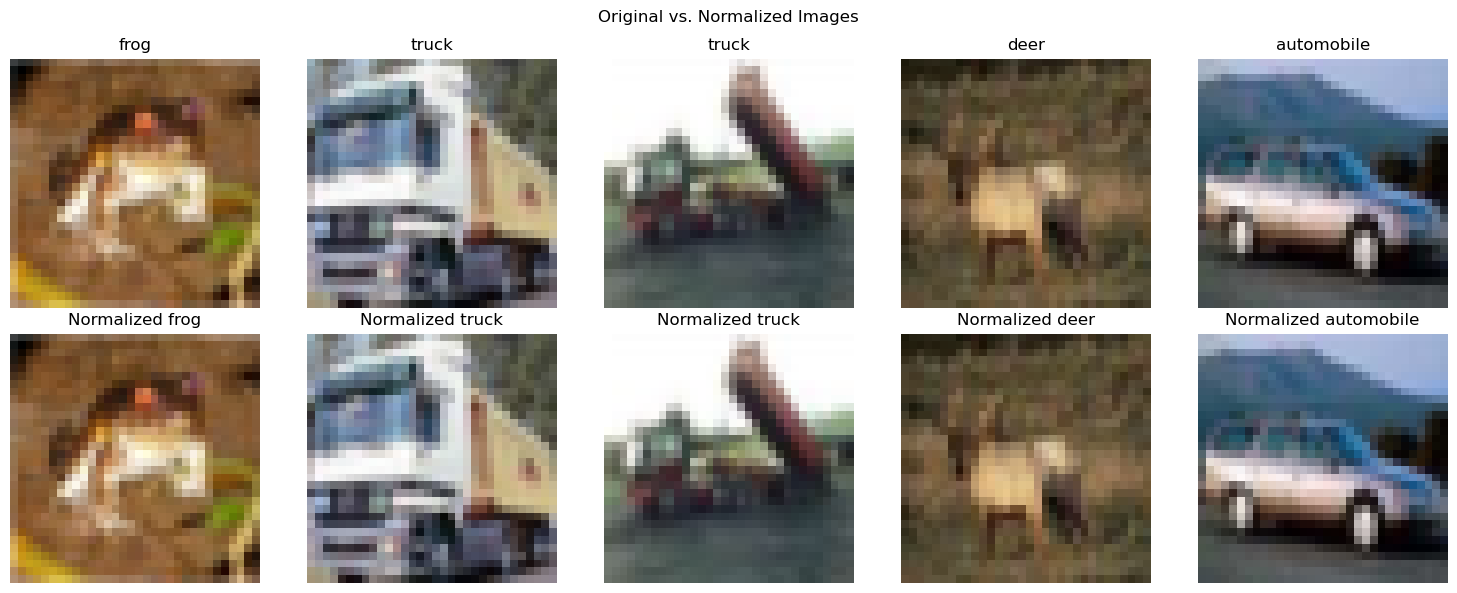

In [13]:
# 4. Visualize original vs. normalized images
x_train_normalized = x_train.astype('float32') / 255.0
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Original vs. Normalized Images")
for i in range(5):
    # Original image
    axes[0, i].imshow(x_train[i])
    axes[0, i].set_title(class_names[y_train[i][0]])
    axes[0, i].axis('off')
    # Normalized image
    axes[1, i].imshow(x_train_normalized[i])
    axes[1, i].set_title(f"Normalized {class_names[y_train[i][0]]}")
    axes[1, i].axis('off')
plt.tight_layout()
plt.show()

In [15]:
# 5. Visualize model predictions
# Load the trained model
model = tf.keras.models.load_model('../models/cifar10_model.h5')

# Prepare test data (flatten and normalize)
x_test_flat = x_test.astype('float32') / 255.0
x_test_flat = x_test_flat.reshape(-1, 32 * 32 * 3)

# Get predictions for first 25 test images
predictions = model.predict(x_test_flat[:25], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)

# Plot test images with predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[predicted_classes[i]]
    conf = confidence_scores[i]
    plt.xlabel(f"True: {true_label}\nPred: {pred_label} ({conf:.2f})", fontsize=8)
plt.suptitle("Model Predictions on Test Images")
plt.tight_layout()
plt.show()

OSError: Unable to synchronously open file (file signature not found)

In [ ]:
# 6. Confusion matrix
# Predict on entire test set
y_pred = model.predict(x_test_flat, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix on CIFAR-10 Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()